# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [42]:
# Dependencies and Setup
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from time import gmtime, strftime
from scipy.stats import linregress
import seaborn as sns
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#!pip install citipy

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [93]:
url= "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = url + "appid=" + weather_api_key + "&units="+ units + "&q="
count=0
subset=1

for city in cities:
    # Build query URL based on current element in cities
    city_url = query_url + city
  
    # Get weather data
    response = requests.get(city_url).json()
               
    #pulls specific information form json
    try:
        cit_name = response["name"]
        count= count+1
        if count > 50:
                subset=subset+1
                count= 1
            
        #print(f"Processing Record {count} of Set {subset} | {cit_name}")
    except:
        #print(f'City not found, skipping')


SyntaxError: unexpected EOF while parsing (<ipython-input-93-f20a7b9d0354>, line 24)

In [92]:
city_name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lng.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    except KeyError as e:
            #print(f'No data found {city}')

SyntaxError: unexpected EOF while parsing (<ipython-input-92-57bbff441589>, line 25)

In [6]:
cities_dict={ "City":city_name,
              "Lat" :lat,
              "Lng":lng,
              "Max Temp":max_temp,
               "Humidity":humidity,
              "Cloudiness":cloudiness,
                "Wind Speed":wind_speed,
                "Country":country,
                "Date":date }       
  
    
cities_df=pd.DataFrame(cities_dict)
#cities_df['Date']=cities_df["Date"].astype(str)
#cities_df["Date"].dt.strftime("%m/%d/%y")
cities_df.to_csv('output_data/output.csv', index=False, header=True)
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,26.01,35,90,4.61,US,1613148956
1,Qaanaaq,77.4840,-69.3632,2.73,71,0,7.09,GL,1613148956
2,Galesong,-5.3166,119.3661,77.00,100,20,4.61,ID,1613148956
3,Atuona,-9.8000,-139.0333,78.35,81,19,13.80,PF,1613148956
4,Ushuaia,-54.8000,-68.3000,59.00,36,40,17.27,AR,1613148956


In [7]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,19.173598,18.010151,51.446123,70.912281,50.643860,8.489105,1.613149e+09
std,33.230082,89.695536,32.765001,20.285641,38.399269,6.514918,8.062952e+01
min,-54.800000,-175.200000,-38.200000,8.000000,0.000000,0.220000,1.613148e+09
25%,-8.463225,-60.008700,30.147500,61.250000,10.250000,4.000000,1.613149e+09
50%,22.622500,21.006650,63.185000,75.000000,50.500000,6.835000,1.613149e+09
75%,46.503825,96.932125,77.000000,86.750000,90.000000,11.500000,1.613149e+09
max,78.218600,179.316700,99.320000,100.000000,100.000000,48.340000,1.613149e+09


In [91]:
#cities_df.dtypes

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#No cities >100
#cities_df.loc[cities_df['Humidity']>100]

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

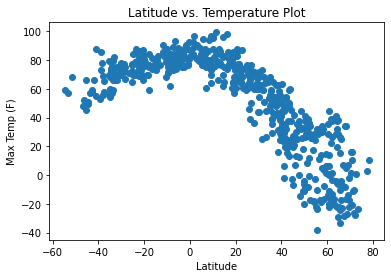

<Figure size 432x288 with 0 Axes>

In [26]:
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,3])
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Latitude vs. Temperature Plot')
plt.show()
plt.savefig("output_data/LatvsTemp.png")

## Latitude vs. Humidity Plot

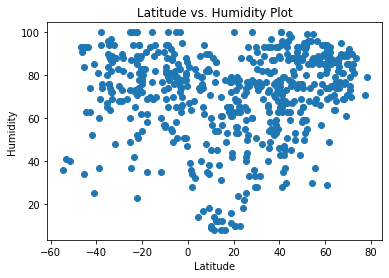

<Figure size 432x288 with 0 Axes>

In [27]:
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,4])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity Plot')
plt.show()
plt.savefig("output_data/LatvsHum.png")

## Latitude vs. Cloudiness Plot

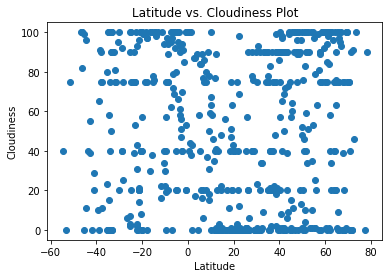

<Figure size 432x288 with 0 Axes>

In [28]:
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,5])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness Plot')
plt.show()
plt.savefig("output_data/LatvsCloud.png")

## Latitude vs. Wind Speed Plot

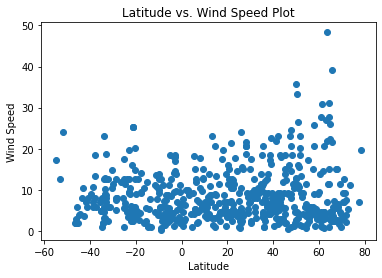

<Figure size 432x288 with 0 Axes>

In [29]:
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,6])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed Plot')
plt.show()
plt.savefig("output_data/LatvsWS.png")

## Linear Regression

In [16]:
N_Hemis_df=cities_df.loc[cities_df['Lat']>0]
N_Hemis_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,26.01,35,90,4.61,US,1613148956
1,Qaanaaq,77.4840,-69.3632,2.73,71,0,7.09,GL,1613148956
8,Kapaa,22.0752,-159.3190,71.60,68,40,12.66,US,1613148862
9,Butaritari,3.0707,172.7902,80.51,83,17,8.72,KI,1613148957
12,Mabay,6.0577,124.4666,79.14,79,89,5.21,PH,1613148958


In [17]:
S_Hemis_df=cities_df.loc[cities_df['Lat']<0]
S_Hemis_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Galesong,-5.3166,119.3661,77.00,100,20,4.61,ID,1613148956
3,Atuona,-9.8000,-139.0333,78.35,81,19,13.80,PF,1613148956
4,Ushuaia,-54.8000,-68.3000,59.00,36,40,17.27,AR,1613148956
5,Mataura,-46.1927,168.8643,48.00,93,100,1.99,NZ,1613148956
6,Vaini,-21.2000,-175.2000,78.80,94,20,5.75,TO,1613148957


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

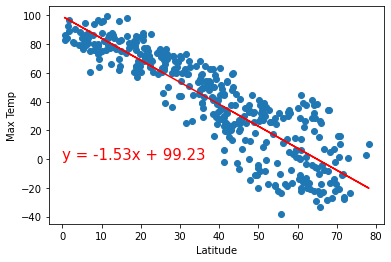

The r-squared is: 0.7748027608367758


<Figure size 432x288 with 0 Axes>

In [90]:
plt.xlabel("Latitude",fontsize =10)
plt.ylabel("Max Temp",fontsize =10)
x_values=N_Hemis_df['Lat']
y_values=N_Hemis_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.show()
plt.savefig("output_data/Nth_MTvsLat_Regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

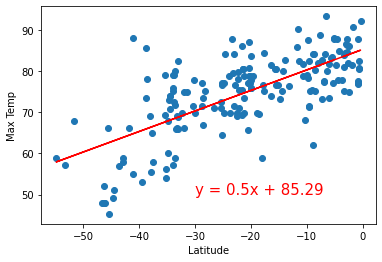

The r-squared is: 0.4845521626217445


<Figure size 432x288 with 0 Axes>

In [89]:
plt.xlabel("Latitude",fontsize =10)
plt.ylabel("Max Temp",fontsize =10)
x_values=S_Hemis_df['Lat']
y_values=S_Hemis_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.show()
plt.savefig("output_data/Sth_MTvsLat_Regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

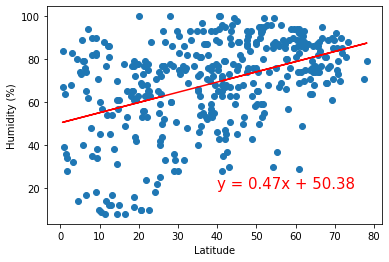

The r-squared is: 0.18602545392139097


<Figure size 432x288 with 0 Axes>

In [87]:
plt.xlabel("Latitude",fontsize =10)
plt.ylabel("Humidity (%)",fontsize =10)
x_values=N_Hemis_df['Lat']
y_values=N_Hemis_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.show()
plt.savefig("output_data/Nth_HumvsLat_Regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

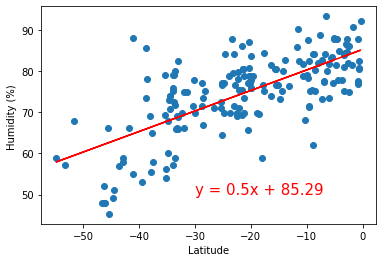

The r-squared is: 0.4845521626217445


<Figure size 432x288 with 0 Axes>

In [84]:
plt.xlabel("Latitude",fontsize =10)
plt.ylabel("Humidity (%) ",fontsize =10)
x_values=S_Hemis_df['Lat']
y_values=S_Hemis_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.show()
plt.savefig("output_data/Sth_HumvsLat_Regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

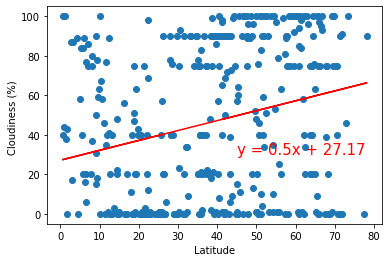

The r-squared is: 0.06463239131679964


<Figure size 432x288 with 0 Axes>

In [83]:
plt.xlabel("Latitude",fontsize =10)
plt.ylabel("Cloudiness (%) ",fontsize =10)
x_values=N_Hemis_df['Lat']
y_values=N_Hemis_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.show()
plt.savefig("output_data/Nth_CldvsLat_Regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

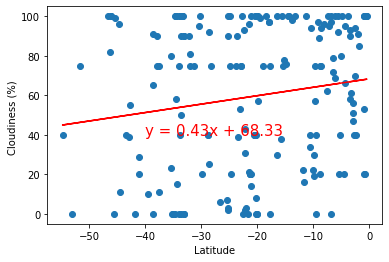

The r-squared is: 0.024996638452084923


<Figure size 432x288 with 0 Axes>

In [80]:
plt.xlabel("Latitude",fontsize =10)
plt.ylabel("Cloudiness (%) ",fontsize =10)
x_values=S_Hemis_df['Lat']
y_values=S_Hemis_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.show()
plt.savefig("output_data/Sth_CldvsLat_Regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

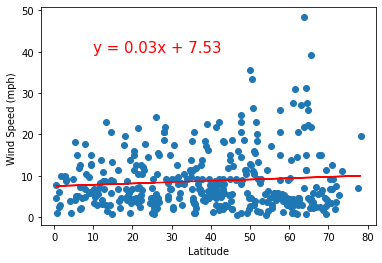

The r-squared is: 0.008022660160042222


<Figure size 432x288 with 0 Axes>

In [78]:
plt.xlabel("Latitude",fontsize =10)
plt.ylabel("Wind Speed (mph) ",fontsize =10)
x_values=N_Hemis_df['Lat']
y_values=N_Hemis_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.show()
plt.savefig("output_data/Nth_CldvsLat_Regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

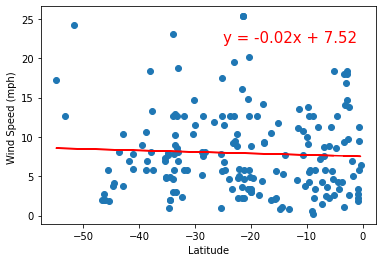

The r-squared is: 0.002285913795613324


<Figure size 432x288 with 0 Axes>

In [72]:
plt.xlabel("Latitude",fontsize =10)
plt.ylabel("Wind Speed (mph) ",fontsize =10)
x_values=S_Hemis_df['Lat']
y_values=S_Hemis_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-25,22),fontsize=15,color="red")
plt.show()
plt.savefig("output_data/Sth_CldvsLat_Regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [76]:
#Seaborn code easier
        
#sns.regplot(x="Lat", y='Wind Speed', data=S_Hemis_df,line_kws={'color': 'red'},x_jitter=.1,y_jitter=.1, 
#ci=None, label="y={0:.1f}x+{1:.1f}".format(slope, intercept)).legend(loc="best")

               
#print(f"The r-squared is: {rvalue**2}")